In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)
import matplotlib as mlp
mlp.rcParams['axes.unicode_minus'] = False

In [3]:
import mglearn

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve

from sklearn.datasets import load_iris, load_boston, load_breast_cancer
from sklearn.datasets import fetch_california_housing

In [231]:
import warnings
warnings.filterwarnings('ignore')

# 1. 인공 신경망(Artificail Neural Network)
- 은닉층의 유무

In [ ]:
mglearn.plots.plot_logistic_regression_graph() # 머신러닝

In [ ]:
mglearn.plots.plot_single_hidden_layer_graph() # 인공신경망, 딥러닝

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph() # 인공신경망, 딥러닝

## (1) Perceptrin (Node)
- 다수의 신호를 입력으로 받아 하나의 신호로 출력

### 1) AND gate

In [ ]:
def AND(x1, x2): # 입력변수
    x= np.array([x1, x2])
    w= np.array([0.5, 0.5]) # 원래 모델이 찾아야하는 값
    b= -0.7
    
    result= np.sum(w*x) +b
    if result <=0:
        return 0
    else:
        return 1

In [ ]:
inputs= [(0,0), (1,0), (0,1), (1,1)]
for x1, x2 in inputs:
    y= AND(x1, x2)
    print('{},{} -> {}'.format(x1, x2, y))

### 2) OR gate

In [ ]:
def OR(x1, x2): # 입력변수
    x= np.array([x1, x2])
    w= np.array([0.5, 0.5]) # 원래 모델이 찾아야하는 값
    b= -0.2
    
    result= np.sum(w*x) +b
    if result <=0:
        return 0
    else:
        return 1

In [ ]:
inputs= [(0,0), (1,0), (0,1), (1,1)]
for x1, x2 in inputs:
    y= OR(x1, x2)
    print('{},{} -> {}'.format(x1, x2, y))

In [ ]:
'''
XOR(Exclusive OR)          
===================
x1   x2    and    or   XOR
-----------------------------
T     T      T     T     F
T     F      F     T     T
F     T      F     T     T
F     F      F     F     F

XOR: 둘이 다르면 T, 같으면 F
비트연산자에서 주로 사용. 데이터 암호화/복호화
'''

In [ ]:
data= 12 # 00001100
key= 25346 # 11000110

# data와 key를 비교하여 XOR 연산(암호화, 복호화)
result= data ^ key
print('암호화된 결과:', result)
print('복호화된 결과:', result ^ key)

### 3) NAND gate

In [ ]:
def NAND(x1, x2): # 입력변수
    x= np.array([x1, x2])
    w= np.array([-0.5, -0.5]) # 원래 모델이 찾아야하는 값
    b= 0.7
    
    result= np.sum(w*x) +b
    if result <=0:
        return 0
    else:
        return 1

In [ ]:
inputs= [(0,0), (1,0), (0,1), (1,1)]
for x1, x2 in inputs:
    y= NAND(x1, x2)
    print('{},{} -> {}'.format(x1, x2, y))

###  4) XOR gate

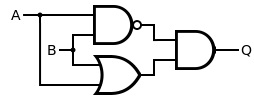

In [ ]:
def XOR(x1, x2):
    s1= OR(x1, x2)
    s2= NAND(x1, x2)
    y= AND(s1, s2)
    
    return y

In [ ]:
inputs= [(0,0), (1,0), (0,1), (1,1)]
for x1, x2 in inputs:
    y= XOR(x1, x2)
    print('{},{} -> {}'.format(x1, x2, y))

## (2) 사이킷런에서의 인공신경망 구현
- Scikit Learn: Preceptron(), MLPClassifier()
- ML, DL Framework: Theano, Tensorflow, Pytorch, ...

### 1) Perceptron(): layer 1개

In [ ]:
iris= load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, test_size=0.3)

In [ ]:
scaler= StandardScaler()
scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
model= Perceptron(max_iter=40, eta0=0.1, random_state=0)
model.fit(X_train, y_train)

In [ ]:
pred= model.predict(X_test)
print(accuracy_score(y_test, pred))

### 2) MLPClassifier()

In [ ]:
iris= load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, test_size=0.3)

In [ ]:
# 입력층은 4개 (X의 columns)
# 200개의 노드가 있는 레이어 3개
model= MLPClassifier(max_iter=100, hidden_layer_sizes=(200,200,200))
model.fit(X_train, y_train)

In [ ]:
pred= model.predict(X_test)
print(accuracy_score(y_test, pred))

# 2. 종합 예제 1
- 여행자 보험 가입여부

In [ ]:
data= pd.read_csv('data/TravelInsurance.csv')
data.head()

## (1) X, y 나누기

In [ ]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

## (2) train, test 나누기

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

## (3) Preprocessing

In [ ]:
#### 연속변수끼리 나누기
X_num = X_train[X_train.columns[0:4]]

#### 범주형 변수끼리 나누기
X_cat = X_train[X_train.columns[4:]]

#### 범주형 변수 원핫인코딩
X_cat = pd.get_dummies(X_cat)

#### 인덱스 재조정
X_cat= X_cat.reset_index(drop=True)

#### 테스트데이터에서도 동일하게 진행
test_num = X_test[X_test.columns[0:4]]
test_cat = X_test[X_test.columns[4:]]
test_cat = pd.get_dummies(test_cat)
test_cat= test_cat.reset_index(drop=True)

In [ ]:
#### 범주형 변수를 동일하게 통합
X_cat.info()
test_cat.info()
# 변수 개수가 다르면 align
X_cat, test_cat= X_cat.align(test_cat, join='outer',axis=1)

In [ ]:
#### 연속형 변수에서 정규화
std = StandardScaler()
std.fit(X_num)
X_scaled = std.transform(X_num)
test_scaled = std.transform(test_num)

#### 통합
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat], axis=1, ignore_index=True)
test_final = pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1, ignore_index=True)

In [ ]:
X_final #1390
test_final #597

## (4) 모델 학습

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn. svm import SVC
from sklearn. naive_bayes import GaussianNB
from sklearn. neural_network import MLPClassifier

### 1) KNN

In [ ]:
model= KNeighborsClassifier()

params= {'n_neighbors': [1,3,5,7,9,11]}
grid_search= GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

In [ ]:
print('Best Parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Test Score:', grid_search.score(test_final, y_test))

In [ ]:
model= KNeighborsClassifier(n_neighbors=11).fit(X_final, y_train)
print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

### 2) LogisticRegression

In [ ]:
model= LogisticRegression()
params= {'C':[1, 10, 100, 0.1, 0.01, 0.001]}
grid_search= GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

In [ ]:
print('Best Parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Test Score:', grid_search.score(test_final, y_test))

In [ ]:
model= LogisticRegression(C=0.01).fit(X_final, y_train)
print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

### 3) DecisionTree

In [ ]:
model= DecisionTreeClassifier()

params={'max_depth':range(2, 10, 2), 'min_samples_leaf':range(1, 50, 2)}
grid_search= GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

In [ ]:
print('Best Parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Test Score:', grid_search.score(test_final, y_test))

In [ ]:
model= DecisionTreeClassifier(max_depth=4, min_samples_leaf=3).fit(X_final, y_train)
print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

### 4) RandomForest

In [ ]:
model= RandomForestClassifier()

params={'n_estimators': range(100, 1000, 100), 'max_features': ['auto','sqrt','log2']}
grid_search= GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

In [ ]:
print('Best Parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Test Score:', grid_search.score(test_final, y_test))

In [ ]:
model= RandomForestClassifier(max_features='sqrt', n_estimators=800).fit(X_final, y_train)
print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

### 4-2) Boosting

### 5) Suport Vector Machine

In [ ]:
model= SVC().fit(X_final, y_train)

print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

params={'C':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['rbf','linear'], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search= GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

In [ ]:
print('Best Parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Test Score:', grid_search.score(test_final, y_test))

In [ ]:
model= SVC(C=10, gamma=0.1, kernel='rbf').fit(X_final, y_train)
print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

### 6) Naive-Bayes (GaussianNB)

In [ ]:
model= GaussianNB().fit(X_final, y_train)

print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

params={'var_smoothing':[0.0001,0.001, 0.01, 0.1, 0,1,2,3,4,5,6,7,8]}
grid_search= GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

In [ ]:
print('Best Parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Test Score:', grid_search.score(test_final, y_test))

In [ ]:
model= GaussianNB(var_smoothing=1).fit(X_final, y_train)
print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

In [ ]:
model= SVC().fit(X_final, y_train)

print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

params={'C':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['rbf','linear'], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search= GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

print('Best Parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Test Score:', grid_search.score(test_final, y_test))

model= SVC(C=10, gamma=0.1, kernel='rbf').fit(X_final, y_train)
print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))model= SVC().fit(X_final, y_train)

print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

params={'C':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['rbf','linear'], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search= GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

print('Best Parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Test Score:', grid_search.score(test_final, y_test))

model= SVC(C=10, gamma=0.1, kernel='rbf').fit(X_final, y_train)
print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

### 7) Artificial Neural Network 인공신경망: MLPClassifier

In [ ]:
model= MLPClassifier().fit(X_final, y_train)

print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

params={'hidden_layer_sizes':[(200,200,200), (200,200,200,200)], 'max_iter':[100,500]}
grid_search= GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

In [ ]:
print('Best Parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Test Score:', grid_search.score(test_final, y_test))

In [ ]:
model= MLPClassifier(hidden_layer_sizes=(200,200,200,200), max_iter=100).fit(X_final, y_train)
print('훈련점수:', model.score(X_final, y_train))
pred= model.predict(test_final)
print('테스트점수:', accuracy_score(y_test, pred))

#### 왜 은닉층이 증가해도 결과가 나아지지 않는가?

# 3. 종합예제2: 캐글 경진대회
- https://www.kaggle.com/competitions/titanic

## (1) prepare data

In [175]:
train= pd.read_csv('data/titanic/train.csv')
test= pd.read_csv('data/titanic/test.csv')

In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## (2) EDA
- python/analysis/3-Matplotlib 참고

In [177]:
def bar_chart(column):
    survived= train[train['Survived']==1][column].value_counts()
    dead= train[train['Survived']==0][column].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index= ['Survived','Dead']
    df.plot.bar(stacked=True, figsize=(5,3))
#     df.plot(kind='bar',stacked=True, figsize=(5,3))

## (3) Feature Engineering

In [178]:
train_test_data= [train, test]

### 1) Name에서 호칭 추출(Mr, Mrs, Miss)

In [179]:
# Lady 안뽑힘;;;
for dataset in train_test_data:
    dataset['Title']= dataset['Name'].str.extract(' ([a-xA-Z]+)\.')

In [182]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([a-zA-Z]+)\.")

In [183]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [184]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [169]:
train[train['Title'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Age1,Fare1
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6,A16,1,NaN,NaN,3.0,2.0


In [185]:
print(train['Title'].value_counts())
print(test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [186]:
# 이름을 숫자 카테고리로 바꾸기
title_map= {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':3, 'Rev':3, 'Dr':3, 'Mme':3, 'Ms':3,
       'Major':3, 'Lady':3, 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3, 'Countess':3,
       'Jonkheer':3, 'Dona':3}

for dataset in train_test_data:
    dataset['Title1']= dataset['Title'].map(title_map)

In [187]:
train.drop('Name', axis=1, inplace=True)
train.drop('Title', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)

### 2) Age의 Binning
- child:0, young:1, adult:2, mid:3, senior:4

In [188]:
train.groupby('Title1')['Age'].transform('median') # 전체값이 그룹에 따라 중앙값으로 대체됨

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [189]:
#### 결측치 처리 (중앙값으로 채우기)

train['Age'].fillna(train.groupby('Title1')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title1')['Age'].transform('median'), inplace=True)

In [190]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title1           0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title1           0
dtype: int64


In [191]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<16, 'Age1']=0
    dataset.loc[(dataset['Age']>=16) & (dataset['Age']<26), 'Age1'] =1
    dataset.loc[(dataset['Age']>=26) & (dataset['Age']<36), 'Age1'] =2
    dataset.loc[(dataset['Age']>=36) & (dataset['Age']<62), 'Age1'] =3
    dataset.loc[dataset['Age']>=62, 'Age1'] =4

In [192]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1,Age1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,3.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,2.0


###  3) Embarked 결측치 처리와 숫자 인코딩

In [193]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [194]:
# 결측치 최빈값 S로 채우기
train['Embarked'].fillna('S', inplace=True)

In [195]:
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [159]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Age1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,1.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,2.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,Mrs,1.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,Mr,0.0,2.0


#### 4) Fare의 결측치 처리와 Binning
- 결측치는 Pclass의 Fare를 median으로 처리해서 넣어준다
- 17 이하면 0, 18~39은 1, 31 ~100은 2, 100이상은 3

In [198]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [199]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title1       891 non-null    int64  
 12  Age1         891 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [205]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, 'Fare1']=0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare1'] =1
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100), 'Fare1'] =2
    dataset.loc[dataset['Fare']>100, 'Fare1'] =4

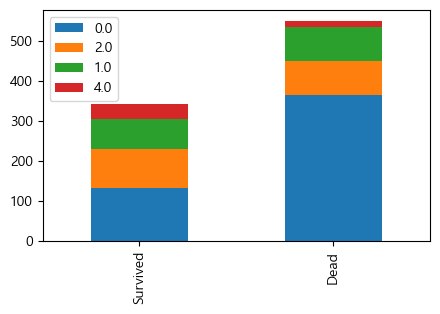

In [206]:
bar_chart('Fare1')

In [207]:
train['Fare1'].value_counts()

0.0    496
2.0    181
1.0    161
4.0     53
Name: Fare1, dtype: int64

In [208]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title1           0
Age1             0
Fare1            0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title1           0
Age1             0
Fare1            0
dtype: int64


In [209]:
train[train['Fare1'].isnull()==True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1,Age1,Fare1


### 5) Cabin 처리
- 알파벳만 남긴 후 bar_chart로 유의미한지 확인

In [210]:
for dataset in train_test_data:
    dataset['Cabin']= dataset['Cabin'].str[:1]

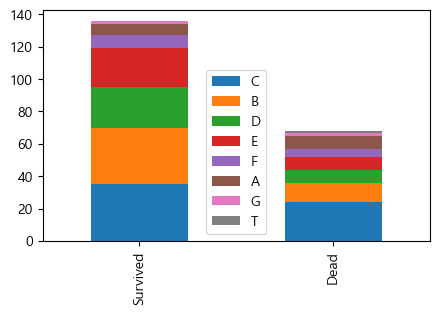

In [211]:
bar_chart('Cabin')

<AxesSubplot:>

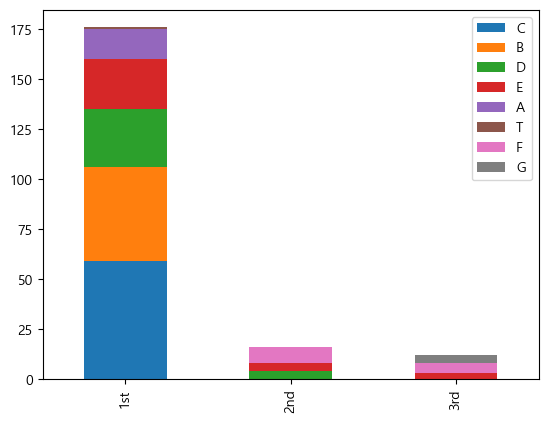

In [212]:
# 객실 번호와 등급의 관계
Pclass1= train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2= train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3= train[train['Pclass']==3]['Cabin'].value_counts()

pd.DataFrame([Pclass1, Pclass2, Pclass3], index=['1st','2nd','3rd']).plot(kind='bar',stacked=True)

In [213]:
for dataset in train_test_data:
    dataset['Cabin']= dataset['Cabin'].map({'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8})

In [214]:
test.Cabin.value_counts()

0.8    35
0.4    18
1.2    13
1.6     9
2.0     8
0.0     7
2.4     1
Name: Cabin, dtype: int64

##### 특성중요도 검사해보기

In [215]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

### 6) 성별 숫자 인코딩

In [216]:
for dataset in train_test_data:
    dataset['Sex']= dataset['Sex'].map({'male':0, 'female':2})

### 7) 동승자 컬럼 합치기

In [217]:
train['FamilySize']= train['SibSp']+train['Parch']+1
test['FamilySize']= test['SibSp']+test['Parch']+1

In [218]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

### 8) 필요없는 특성 제거 및 모델링 데이터 준비

In [219]:
for dataset in train_test_data:
    dataset.drop('Age', axis=1, inplace=True)
    dataset.drop('Fare', axis=1, inplace=True)

In [220]:
features_drop=['Ticket','SibSp','Parch']

train= train.drop(features_drop, axis=1)
test= test.drop(features_drop, axis=1)

In [221]:
train= train.drop('PassengerId', axis=1)

In [222]:
X= train.drop('Survived', axis=1)
y= train['Survived']

In [223]:
print(X.shape, y.shape)

(891, 8) (891,)


In [224]:
X.head()

,Pclass,Sex,Cabin,Embarked,Title1,Age1,Fare1,FamilySize
0,3,0,2.0,0,0,1.0,0.0,2
1,1,2,0.8,1,1,3.0,2.0,2
2,3,2,2.0,0,2,2.0,0.0,1
3,1,2,0.8,0,1,2.0,2.0,2
4,3,0,2.0,0,0,2.0,0.0,1


In [225]:
X.to_csv('data/titanic/train_data.csv', index=False)
y.to_csv('data/titanic/target.csv', index=False)
test.to_csv('data/titanic/test_data.csv', index=False)

## (2) Model Training
- KNN
- DecisionTree
- RandomForest
- SVM
- NaiveBayes
- NeuralNetwork

In [226]:
from sklearn.model_selection import KFold

kfold= KFold(n_splits=10, shuffle=True, random_state=0)

### KNN

In [232]:
knnclf= KNeighborsClassifier(n_neighbors=20)
score= cross_val_score(knnclf, X, y, cv=kfold, scoring='accuracy')
print(score)
print(round(np.mean(score)*100, 2))

[0.83333333 0.79775281 0.82022472 0.83146067 0.82022472 0.84269663
 0.82022472 0.80898876 0.82022472 0.84269663]
82.38


In [228]:
X

,Pclass,Sex,Cabin,Embarked,Title1,Age1,Fare1,FamilySize
0,3,0,2.0,0,0,1.0,0.0,2
1,1,2,0.8,1,1,3.0,2.0,2
2,3,2,2.0,0,2,2.0,0.0,1
3,1,2,0.8,0,1,2.0,2.0,2
4,3,0,2.0,0,0,2.0,0.0,1
...,...,...,...,...,...,...,...,...
886,2,0,1.8,0,3,2.0,0.0,1
887,1,2,0.4,0,2,1.0,1.0,1
888,3,2,2.0,0,2,1.0,1.0,4
889,1,0,0.8,1,0,2.0,1.0,1


### DecisionTree

In [51]:
#### DecisionTree

dtclf= DecisionTreeClassifier(max_depth=6)
score = cross_val_score(dtclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.8        0.87640449 0.79775281 0.82022472 0.87640449 0.78651685
 0.84269663 0.83146067 0.79775281 0.83146067]
82.61


### RandomForest

In [52]:
#### RandomForest
rfclf= RandomForestClassifier(n_estimators=200)
score = cross_val_score(rfclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.8        0.86516854 0.80898876 0.79775281 0.88764045 0.84269663
 0.82022472 0.80898876 0.7752809  0.82022472]
82.27


### NaiveBayes

In [53]:
#### NaiveBayes
from sklearn.naive_bayes import BernoulliNB

nbclf= BernoulliNB()
score = cross_val_score(nbclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.77777778 0.76404494 0.82022472 0.76404494 0.7752809  0.78651685
 0.75280899 0.7752809  0.80898876 0.83146067]
78.56


### SupportVector

In [55]:
#### SupportVector

scaler= MinMaxScaler()
scaler.fit(X)

X_scaled= scaler.transform(X)

svmclf= SVC()
score = cross_val_score(svmclf, X_scaled, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.81111111 0.84269663 0.79775281 0.83146067 0.85393258 0.82022472
 0.83146067 0.82022472 0.79775281 0.82022472]
82.27


### Neural

In [58]:
#### Neural

mlclf= MLPClassifier(hidden_layer_sizes=(300,300,300))
score = cross_val_score(mlclf, X_scaled, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.82222222 0.78651685 0.79775281 0.82022472 0.8988764  0.80898876
 0.83146067 0.82022472 0.84269663 0.86516854]
82.94


## (5) Testing

In [68]:
model= SVC()
model.fit(X_scaled, y)

SVC()

In [69]:
test_copy= test.drop('PassengerId', axis=1).copy()
test_copy= scaler.transform(test_copy)

In [70]:
preds= model.predict(test_copy)

In [71]:
submission= pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':preds})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
submission.to_csv('data/titanic/submission.csv', index=False)